In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [ ]:
!gdown 1o0_nFw5-NnNE1lMXdsCTUtrByNbAs1KM

Downloading...
From: https://drive.google.com/uc?id=1o0_nFw5-NnNE1lMXdsCTUtrByNbAs1KM
To: /content/Telco_customer_churn_adapted_v2.xlsx
100% 613k/613k [00:00<00:00, 107MB/s]


In [ ]:
df = pd.read_excel("Telco_customer_churn_adapted_v2.xlsx")
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


In [ ]:
df.describe()

,Customer ID,Tenure Months,Monthly Purchase (Thou. IDR),Longitude,Latitude,CLTV (Predicted Thou. IDR)
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,32.371149,84.190200,107.043246,-6.404184,5720.384481
std,2033.283305,24.559481,39.117061,0.358316,0.322898,1537.974298
min,0.000000,0.000000,23.725000,106.816666,-6.914744,2603.900000
25%,1760.500000,9.000000,46.150000,106.816666,-6.914744,4509.700000
50%,3521.000000,29.000000,91.455000,106.816666,-6.200000,5885.100000
75%,5281.500000,55.000000,116.805000,107.609810,-6.200000,6994.650000
max,7042.000000,72.000000,154.375000,107.609810,-6.200000,8450.000000


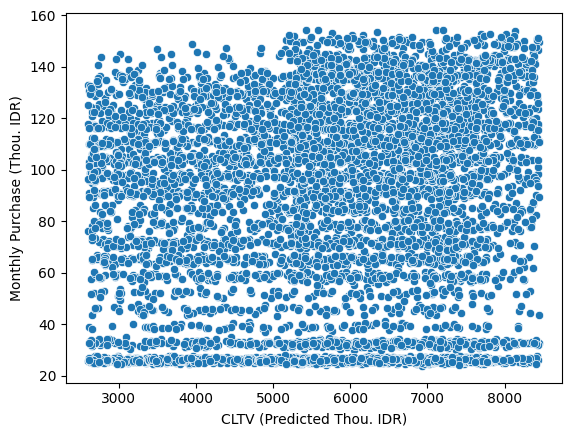

In [ ]:
sns.scatterplot(data=df, x="CLTV (Predicted Thou. IDR)", y="Monthly Purchase (Thou. IDR)");

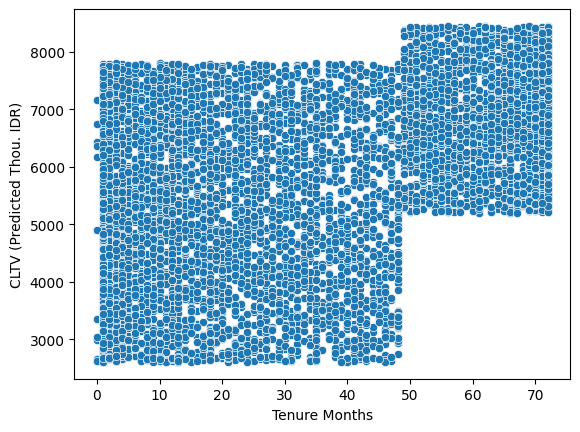

In [ ]:
sns.scatterplot(data=df, x="Tenure Months", y="CLTV (Predicted Thou. IDR)");

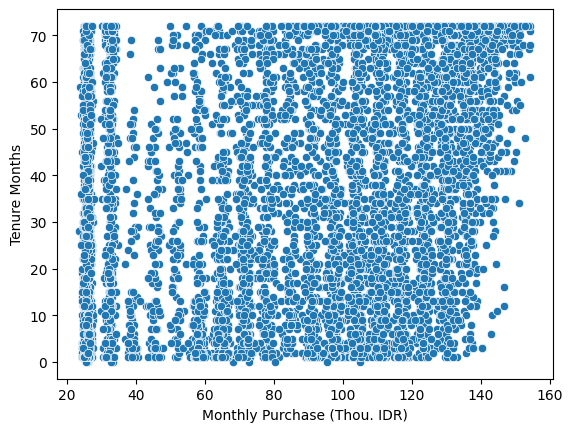

In [ ]:
sns.scatterplot(data=df, x="Monthly Purchase (Thou. IDR)", y="Tenure Months");

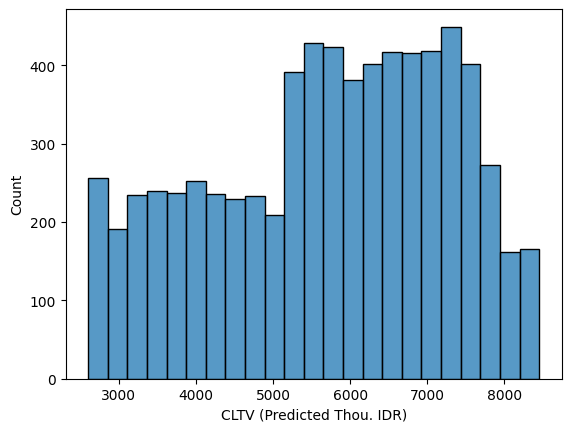

In [ ]:
sns.histplot(df["CLTV (Predicted Thou. IDR)"]);

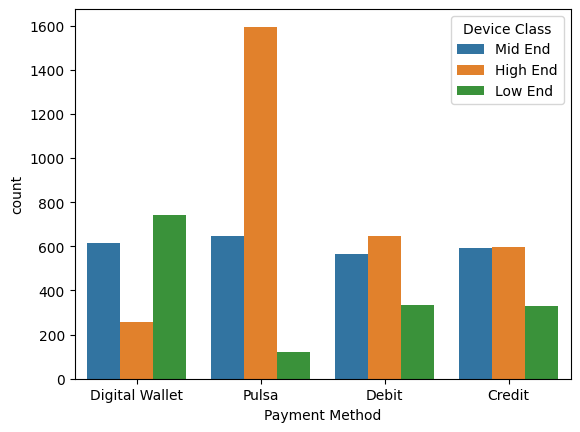

In [ ]:
sns.countplot(data=df, x="Payment Method", hue="Device Class");

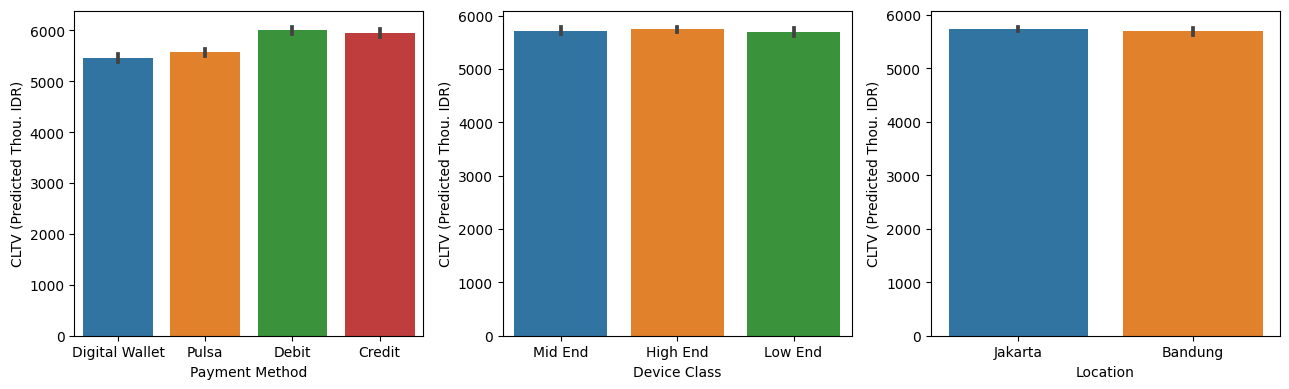

In [ ]:
plt.figure(figsize=(13, 4))
plt.subplot(1, 3, 1)
sns.barplot(data=df, x="Payment Method", y="CLTV (Predicted Thou. IDR)");
plt.subplot(1, 3, 2)
sns.barplot(data=df, x="Device Class", y="CLTV (Predicted Thou. IDR)");
plt.subplot(1, 3, 3)
sns.barplot(data=df, x="Location", y="CLTV (Predicted Thou. IDR)");
plt.tight_layout()

In [ ]:
df[["Location", "CLTV (Predicted Thou. IDR)"]].groupby("Location").mean()

,CLTV (Predicted Thou. IDR)
Location,
Bandung,5695.083549
Jakarta,5730.502842


Mencoba cari tahu dari mana asal perhitungan CLTV

In [ ]:
df.columns

Index(['Customer ID', 'Tenure Months', 'Location', 'Device Class',
       'Games Product', 'Music Product', 'Education Product', 'Call Center',
       'Video Product', 'Use MyApp', 'Payment Method',
       'Monthly Purchase (Thou. IDR)', 'Churn Label', 'Longitude', 'Latitude',
       'CLTV (Predicted Thou. IDR)'],
      dtype='object')

In [ ]:
products = ['Games Product', 'Music Product', 'Education Product', 'Call Center', 'Video Product', 'Use MyApp']

temp = df[df["Music Product"] == "No internet service"][products]

for col in temp.columns:
    print(col)
    print(temp[col].unique(), end="\n\n")

Games Product
['No internet service']

Music Product
['No internet service']

Education Product
['No internet service']

Call Center
['No']

Video Product
['No internet service']

Use MyApp
['No internet service']



In [ ]:
total_products = list()
for i in tqdm(range(len(df))):
    total = df.iloc[i][products].replace({"Yes" : 1, "No" : 0, "No internet service" : 0}).sum()
    total_products.append(total)

df["total_products"] = total_products

100%|██████████| 7043/7043 [00:18<00:00, 382.35it/s]


<Axes: xlabel='CLTV (Predicted Thou. IDR)', ylabel='total_products'>

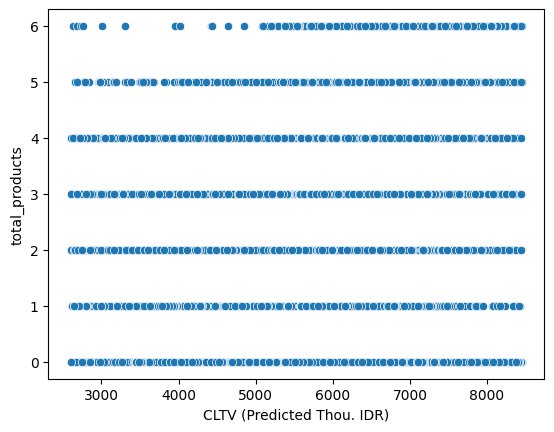

In [ ]:
sns.scatterplot(data=df, x="CLTV (Predicted Thou. IDR)", y="total_products")

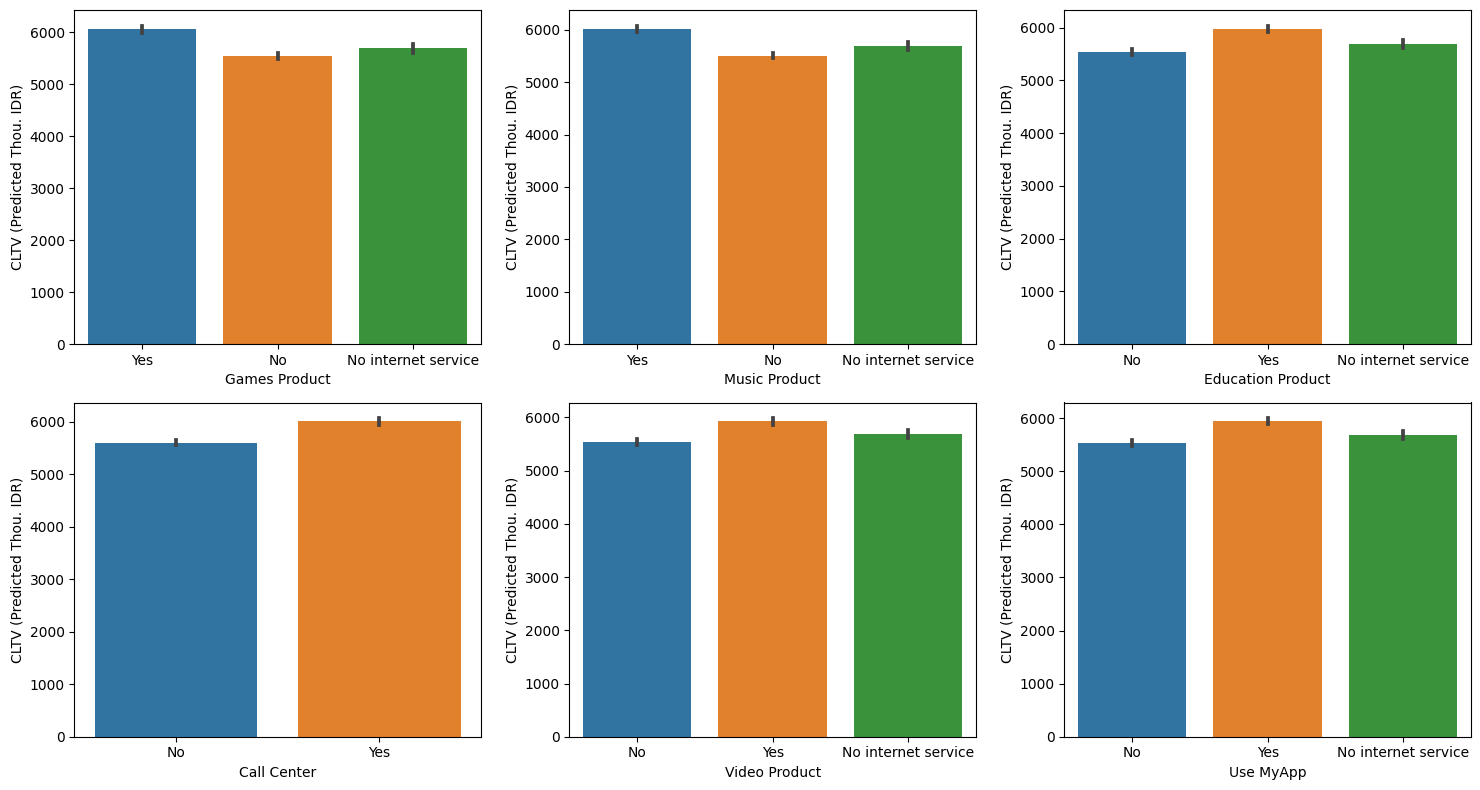

In [ ]:
plt.figure(figsize=(15, 8))
for i in range(6):
    temp = df[[products[i], "CLTV (Predicted Thou. IDR)"]].groupby(products[i]).mean()
    plt.subplot(2, 3, i+1)
    # sns.barplot(x=temp.index, y=temp.iloc[:, 0])
    sns.barplot(data=df, x=products[i], y="CLTV (Predicted Thou. IDR)")
plt.tight_layout()
plt.show()

Pertanyaan yang ingin coba dijawab: apakah penggunaan produk mempengaruhi CLTV dari customer tersebut?

Dari visualisasi itu tidak terlalu nampak. Kita hanya lihat untuk customer yang menggunakan 6 produk CLTV-nya kebanyakan >5000. tapi tidak bisa diambil kesimpulan seperti itu. harus menggunakan uji hipotesis

Coba kita lihat lagi dari sisi tenure months terhadap CLTV lebih dalam

In [ ]:
from scipy.stats import pearsonr

pearsonr(df["Tenure Months"], df["CLTV (Predicted Thou. IDR)"])

PearsonRResult(statistic=0.3964056803279581, pvalue=1.0145623851538518e-263)

Korelasinya lumayan walopun ga signifikan.

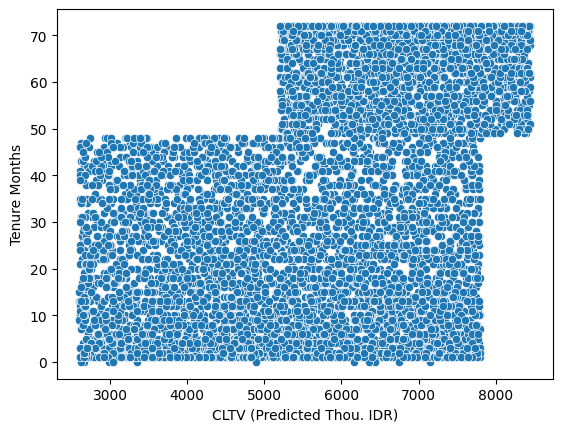

In [ ]:
sns.scatterplot(data=df, x="CLTV (Predicted Thou. IDR)", y="Tenure Months");

Satu satunya pola yang keliatan hahaha

In [ ]:
pearsonr(df["Monthly Purchase (Thou. IDR)"], df["CLTV (Predicted Thou. IDR)"])

PearsonRResult(statistic=0.09869320961239764, pvalue=1.0289893722336886e-16)

Gak Nemu APA-APA

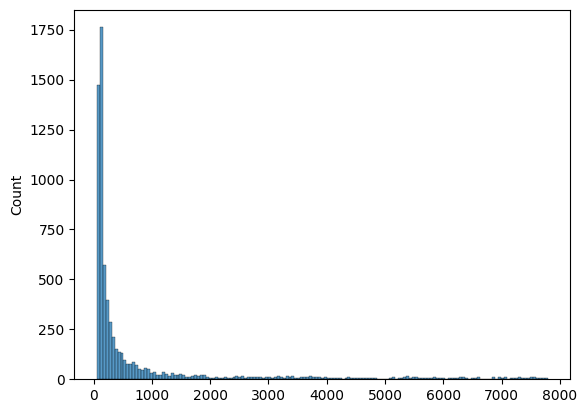

In [ ]:
sns.histplot(df["CLTV (Predicted Thou. IDR)"] / df["Tenure Months"]);

wow ada yang CLTV-nya diatas 7000 padahal tenure months baru 1 bulan

In [ ]:
df[(df["CLTV (Predicted Thou. IDR)"] > 7000) & (df["Tenure Months"] == 1)]

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR),total_products
6,6,1,Jakarta,Mid End,No,No,Yes,No,No,Yes,Pulsa,51.545,Yes,106.816666,-6.200000,7062.9,2
59,59,1,Bandung,Mid End,Yes,No,No,No,No,No,Digital Wallet,63.115,Yes,107.609810,-6.914744,7393.1,1
61,61,1,Bandung,Mid End,No,Yes,No,No,Yes,No,Pulsa,52.260,Yes,107.609810,-6.914744,7576.4,2
117,117,1,Jakarta,High End,No,Yes,No,No,No,No,Pulsa,97.110,Yes,106.816666,-6.200000,7774.0,1
136,136,1,Jakarta,High End,No,No,No,No,No,Yes,Pulsa,110.500,Yes,106.816666,-6.200000,7382.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6410,6410,1,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Credit,25.220,No,106.816666,-6.200000,7235.8,0
6452,6452,1,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,26.065,No,106.816666,-6.200000,7554.3,0
6766,6766,1,Jakarta,Mid End,No,No,No,No,Yes,No,Pulsa,71.045,No,106.816666,-6.200000,7646.6,1
6854,6854,1,Bandung,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,25.545,No,107.609810,-6.914744,7090.2,0


Sangat bervariasi, jadi akan sulit modelingnya

<Axes: xlabel='CLTV (Predicted Thou. IDR)', ylabel='Count'>

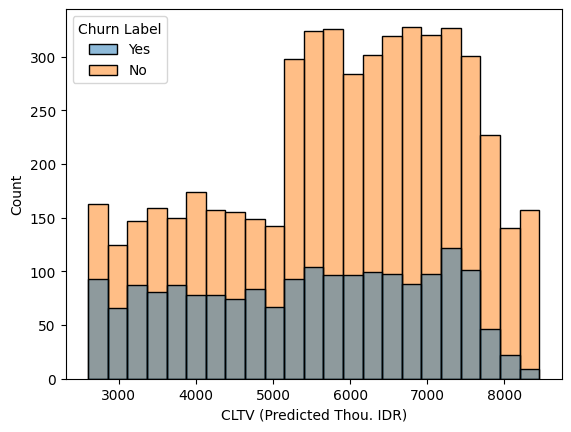

In [ ]:
sns.histplot(data=df, x="CLTV (Predicted Thou. IDR)", hue="Churn Label")

In [ ]:
df[["CLTV (Predicted Thou. IDR)", "Churn Label"]].groupby("Churn Label").mean()

,CLTV (Predicted Thou. IDR)
Churn Label,
No,5838.197739
Yes,5394.239058


Shit, ga masuk akal

# Normalisasi CLTV

In [ ]:
df["cltv_norm"] = (df["CLTV (Predicted Thou. IDR)"] - df["CLTV (Predicted Thou. IDR)"].min()) / (df["CLTV (Predicted Thou. IDR)"].max() - df["CLTV (Predicted Thou. IDR)"].min())

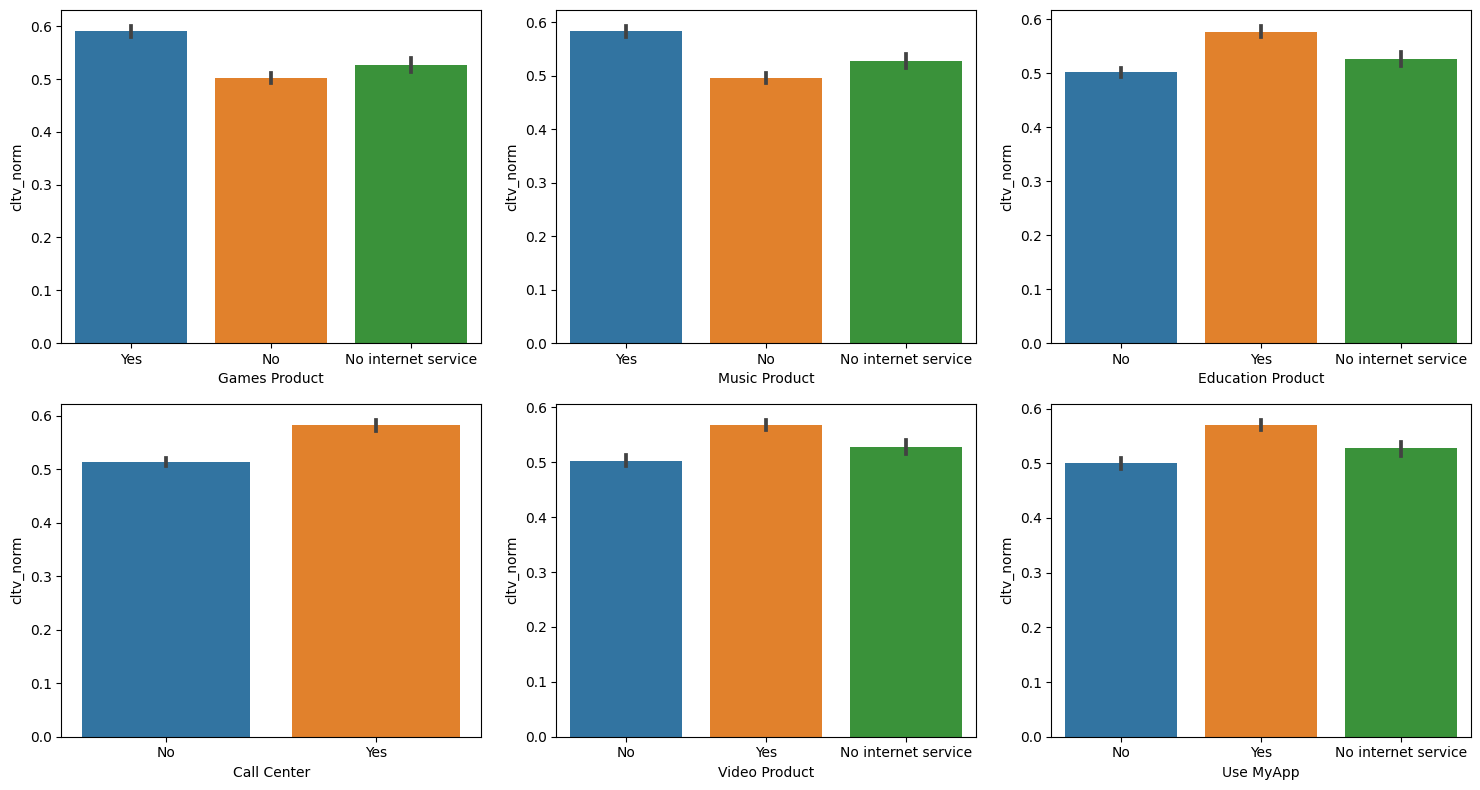

In [ ]:
plt.figure(figsize=(15, 8))
for i in range(6):
    temp = df[[products[i], "CLTV (Predicted Thou. IDR)"]].groupby(products[i]).mean()
    plt.subplot(2, 3, i+1)
    # sns.barplot(x=temp.index, y=temp.iloc[:, 0])
    sns.barplot(data=df, x=products[i], y="cltv_norm")
plt.tight_layout()
plt.show()